# Network attacks - Detection

## I - Modules

In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score,recall_score,roc_curve,roc_auc_score,ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import numpy as np

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## II - Charger donnée

Utilisons donnée préparée :

In [2]:
### ne pas rediviser dataset, il a déjà été divisé dans preparation
def load_data(size):
    if size=="full":
        df_normal = pd.read_csv("preparation/network_normal.csv")
        df_attack_1 = pd.read_csv("preparation/network_1.csv")
        df_attack_2 = pd.read_csv("preparation/network_2.csv")
        df_attack_3 = pd.read_csv("preparation/network_3.csv")
        df_attack_4 = pd.read_csv("preparation/network_4.csv")
    
    elif size=="/2":
        df_normal = pd.read_csv("preparation/network_normal.csv", skiprows=lambda x: x % 2 != 0)
        df_attack_1 = pd.read_csv("preparation/network_1.csv", skiprows=lambda x: x % 2 != 0)
        df_attack_2 = pd.read_csv("preparation/network_2.csv", skiprows=lambda x: x % 2 != 0)
        df_attack_3 = pd.read_csv("preparation/network_3.csv", skiprows=lambda x: x % 2 != 0)
        df_attack_4 = pd.read_csv("preparation/network_4.csv", skiprows=lambda x: x % 2 != 0)
    
    elif size=="/4":
        df_normal = pd.read_csv("preparation/network_normal.csv", skiprows=lambda x: x % 4 != 0)
        df_attack_1 = pd.read_csv("preparation/network_1.csv", skiprows=lambda x: x % 4 != 0)
        df_attack_2 = pd.read_csv("preparation/network_2.csv", skiprows=lambda x: x % 4 != 0)
        df_attack_3 = pd.read_csv("preparation/network_3.csv", skiprows=lambda x: x % 4 != 0)
        df_attack_4 = pd.read_csv("preparation/network_4.csv", skiprows=lambda x: x % 4 != 0)
    
    elif size=="/10":
        df_normal = pd.read_csv("preparation/network_normal.csv", skiprows=lambda x: x % 10 != 0)
        df_attack_1 = pd.read_csv("preparation/network_1.csv", skiprows=lambda x: x % 10 != 0)
        df_attack_2 = pd.read_csv("preparation/network_2.csv", skiprows=lambda x: x % 10 != 0)
        df_attack_3 = pd.read_csv("preparation/network_3.csv", skiprows=lambda x: x % 10 != 0)
        df_attack_4 = pd.read_csv("preparation/network_4.csv", skiprows=lambda x: x % 10 != 0)
    
    return df_normal, df_attack_1, df_attack_2, df_attack_3, df_attack_4

In [3]:
### !!!! ne pas rediviser dataset, il a déjà été divisé dans preparation !!!!!!
# Laisser à full

df_normal, df_attack_1, df_attack_2, df_attack_3, df_attack_4 = load_data("full ")

## III - Fonctions

### 1 - Matrice de confusion

In [4]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



import os

def plot_confusion_matrix(y_preds, y_true, labels, save_cof_mat=False, conf_mat_name="conf_mat", model_name="model"):
    cm = confusion_matrix(y_true, y_preds,normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))

    labels_for_fig = [(l[0:4]+'.' if isinstance(l, str) else str(l)) for l in labels]
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=labels_for_fig)
    try:
        disp.plot(cmap="Blues", values_format="4f", ax=ax, colorbar=False)

        if save_cof_mat:
            # Create the folder if it doesn't exist
            folder_path = f"./images/network/Results/{model_name}/Confusion_matrix"
            if not os.path.exists(folder_path):
                os.makedirs(folder_path)

            plt.savefig(f"{folder_path}/{conf_mat_name}.png")
    except:
        print("Error")
        print(pd.unique(y_preds))
        print(pd.unique(y_true))
        print(labels)
    plt.title("Normalized confusion matrix")
    plt.show()



def eval_model(y_pred, y_test, labels, save_cof_mat=False, conf_mat_name="conf_mat", model_name="model"):
    plot_confusion_matrix(list(y_pred), list(y_test), labels, save_cof_mat, conf_mat_name, model_name)

    print(classification_report(y_test, y_pred))
    
    # Print the confusion matrix directly
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    
    # Compute and print metrics for each class
    for i, label in enumerate(labels):
        tp = cm[i, i]
        fp = cm[:, i].sum() - tp
        fn = cm[i, :].sum() - tp
        tn = cm.sum() - (tp + fp + fn)

        # print("tp", tp)
        # print("fp", fp)
        # print("fn", fn)
        # print("tn", tn)
        
        tnr = tn / (tn + fp)  # True negative rate
        tpr = tp / (tp + fn)  # True positive rate
        fnr = fn / (fn + tp)  # False negative rate
        fpr = fp / (fp + tn)  # False positive rate

        
        
        print(f"\nMetrics for class {label}:")
        print(f"True negative rate: {tnr:.4f}")
        print(f"True positive rate: {tpr:.4f}")
        print(f"False negative rate: {fnr:.4f}")
        print(f"False positive rate: {fpr:.4f}")
    
    
    

### 2 - KNN

In [ ]:
all_df = pd.concat([df_normal, df_attack_1, df_attack_2, df_attack_3, df_attack_4])
unique_labels = all_df['label'].unique()
print(unique_labels)


In [5]:
def KNN_attack_detection(df, name_df="xxx", model_name="xxx"):
    new_df = df.copy()
    print("taille",len(df))
    X = new_df.drop('label', axis=1)  # Caractéristiques
    y = new_df['label']  # Cible
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

    # k autour de 10 (à tester)
    k = len(pd.unique(y_test))


    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)


    y_pred = knn_model.predict(X_test)
    eval_model(y_pred, y_test, knn_model.classes_, True, name_df, model_name)

### 3 - Random Forest

In [6]:
# Import the model we are using
# Instantiate model with 1000 decision trees


from sklearn.ensemble import RandomForestClassifier


def randomForest_attack_detector(df, name_df="xxx", model_name="xxx"):
    new_df = df.copy()
    n = 0
    labels = pd.unique(new_df["label"])
    mapping = {}
    for label in labels:
        mapping[label] = n
        n += 1

    new_df["label"] = new_df["label"].map(mapping)
    
    X = new_df.drop('label', axis=1)  # Features
    y = new_df['label']  # Target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

    rf = RandomForestClassifier(n_estimators=20, random_state=42)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_test)
    eval_model(y_pred, y_test, rf.classes_, True, name_df, model_name)

### 4 - MLP

In [7]:


def MLP_attack_detector(df, name_df="xxx", model_name="xxx"):
    new_df = df.copy()
    print("taille",len(df))
    X = new_df.drop('label', axis=1)  # Caractéristiques
    y = new_df['label']  # Cible
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    clf = MLPClassifier(random_state=1, max_iter=300)
    clf.fit(X_train, y_train)


    y_pred = clf.predict(X_test)
    eval_model(y_pred, y_test, clf.classes_, True, name_df, model_name)

### 5 - SVM

In [8]:




def SVM_attack_detector(df, name_df="xxx", model_name="xxx"):
    new_df = df.copy()
    print("taille",len(df))
    X = new_df.drop('label', axis=1)  # Caractéristiques
    y = new_df['label']  # Cible
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
    clf.fit(X_train, y_train)



    y_pred = clf.predict(X_test)
    eval_model(y_pred, y_test, clf.classes_, True, name_df, model_name)

## IV - Detection

### 1 - KNN



df_attack_1
taille 5526


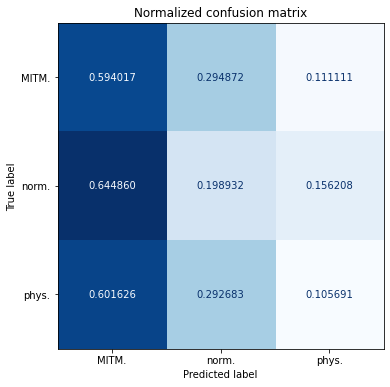

                precision    recall  f1-score   support

          MITM       0.20      0.59      0.30       234
        normal       0.59      0.20      0.30       749
physical fault       0.08      0.11      0.09       123

      accuracy                           0.27      1106
     macro avg       0.29      0.30      0.23      1106
  weighted avg       0.45      0.27      0.27      1106


Metrics for class MITM:
True negative rate: 0.3612
True positive rate: 0.5940
False negative rate: 0.4060
False positive rate: 0.6388

Metrics for class normal:
True negative rate: 0.7059
True positive rate: 0.1989
False negative rate: 0.8011
False positive rate: 0.2941

Metrics for class physical fault:
True negative rate: 0.8545
True positive rate: 0.1057
False negative rate: 0.8943
False positive rate: 0.1455


df_attack_2
taille 4776


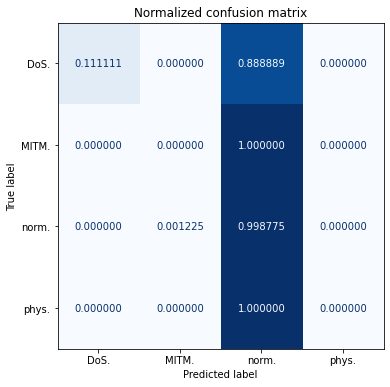

/home/orfeu/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/orfeu/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/orfeu/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

           DoS       1.00      0.11      0.20        36
          MITM       0.00      0.00      0.00        47
        normal       0.86      1.00      0.92       816
physical fault       0.00      0.00      0.00        57

      accuracy                           0.86       956
     macro avg       0.46      0.28      0.28       956
  weighted avg       0.77      0.86      0.79       956


Metrics for class DoS:
True negative rate: 1.0000
True positive rate: 0.1111
False negative rate: 0.8889
False positive rate: 0.0000

Metrics for class MITM:
True negative rate: 0.9989
True positive rate: 0.0000
False negative rate: 1.0000
False positive rate: 0.0011

Metrics for class normal:
True negative rate: 0.0286
True positive rate: 0.9988
False negative rate: 0.0012
False positive rate: 0.9714

Metrics for class physical fault:
True negative rate: 1.0000
True positive rate: 0.0000
False negative rate: 1.0000
False positive rate: 0.000

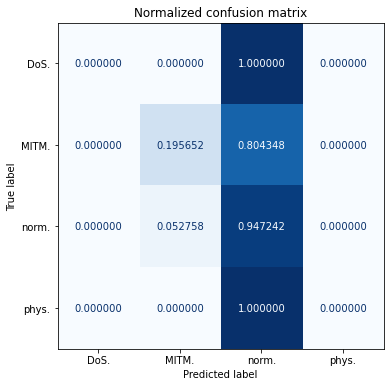

/home/orfeu/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/orfeu/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/orfeu/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

           DoS       0.00      0.00      0.00        21
          MITM       0.29      0.20      0.23        46
        normal       0.75      0.95      0.84       417
physical fault       0.00      0.00      0.00        76

      accuracy                           0.72       560
     macro avg       0.26      0.29      0.27       560
  weighted avg       0.58      0.72      0.64       560


Metrics for class DoS:
True negative rate: 1.0000
True positive rate: 0.0000
False negative rate: 1.0000
False positive rate: 0.0000

Metrics for class MITM:
True negative rate: 0.9572
True positive rate: 0.1957
False negative rate: 0.8043
False positive rate: 0.0428

Metrics for class normal:
True negative rate: 0.0629
True positive rate: 0.9472
False negative rate: 0.0528
False positive rate: 0.9371

Metrics for class physical fault:
True negative rate: 1.0000
True positive rate: 0.0000
False negative rate: 1.0000
False positive rate: 0.000

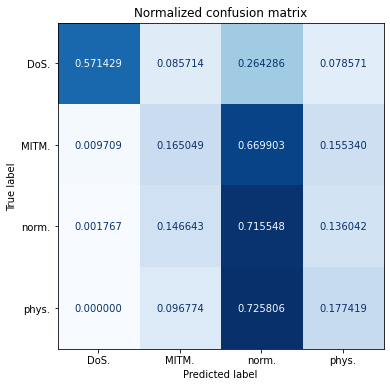

                precision    recall  f1-score   support

           DoS       0.98      0.57      0.72       140
          MITM       0.14      0.17      0.15       103
        normal       0.73      0.72      0.72       566
physical fault       0.10      0.18      0.12        62

      accuracy                           0.59       871
     macro avg       0.49      0.41      0.43       871
  weighted avg       0.65      0.59      0.61       871


Metrics for class DoS:
True negative rate: 0.9973
True positive rate: 0.5714
False negative rate: 0.4286
False positive rate: 0.0027

Metrics for class MITM:
True negative rate: 0.8685
True positive rate: 0.1650
False negative rate: 0.8350
False positive rate: 0.1315

Metrics for class normal:
True negative rate: 0.5049
True positive rate: 0.7155
False negative rate: 0.2845
False positive rate: 0.4951

Metrics for class physical fault:
True negative rate: 0.8714
True positive rate: 0.1774
False negative rate: 0.8226
False positive rate: 0.128

In [9]:
dataframes = [df_attack_1, df_attack_2, df_attack_3, df_attack_4]
dataframes_name = ['df_attack_1', 'df_attack_2', 'df_attack_3', 'df_attack_4']

i=0
for df in dataframes:
    print("\n\n\033[1;33m" + dataframes_name[i] + "\033[0m")
    KNN_attack_detection(df, dataframes_name[i] + "_conf_mat", "KNN")
    i+=1

taille 17449


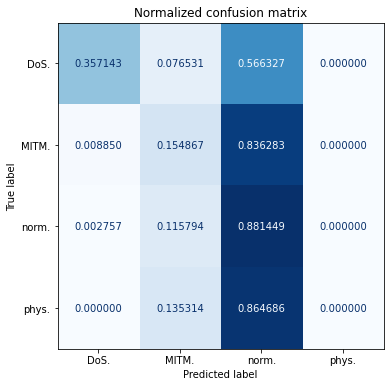

                precision    recall  f1-score   support

           DoS       0.86      0.36      0.51       196
          MITM       0.17      0.15      0.16       452
        normal       0.75      0.88      0.81      2539
physical fault       0.00      0.00      0.00       303

      accuracy                           0.68      3490
     macro avg       0.44      0.35      0.37      3490
  weighted avg       0.61      0.68      0.64      3490


Metrics for class DoS:
True negative rate: 0.9967
True positive rate: 0.3571
False negative rate: 0.6429
False positive rate: 0.0033

Metrics for class MITM:
True negative rate: 0.8848
True positive rate: 0.1549
False negative rate: 0.8451
False positive rate: 0.1152

Metrics for class normal:
True negative rate: 0.2103
True positive rate: 0.8814
False negative rate: 0.1186
False positive rate: 0.7897

Metrics for class physical fault:
True negative rate: 1.0000
True positive rate: 0.0000
False negative rate: 1.0000
False positive rate: 0.000

/home/orfeu/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/orfeu/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/orfeu/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
KNN_attack_detection(pd.concat([df_attack_1,df_attack_2,df_attack_3,df_attack_4]),"all_attacks_conf_mat", "KNN")

taille 25206


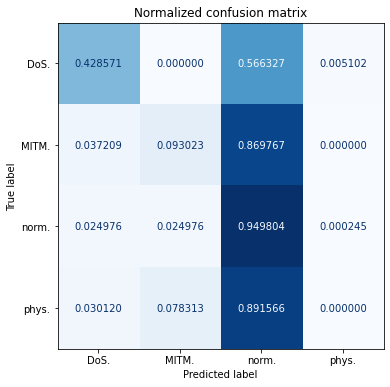

                precision    recall  f1-score   support

           DoS       0.40      0.43      0.41       196
          MITM       0.24      0.09      0.13       430
        normal       0.83      0.95      0.89      4084
physical fault       0.00      0.00      0.00       332

      accuracy                           0.79      5042
     macro avg       0.37      0.37      0.36      5042
  weighted avg       0.71      0.79      0.75      5042


Metrics for class DoS:
True negative rate: 0.9736
True positive rate: 0.4286
False negative rate: 0.5714
False positive rate: 0.0264

Metrics for class MITM:
True negative rate: 0.9722
True positive rate: 0.0930
False negative rate: 0.9070
False positive rate: 0.0278

Metrics for class normal:
True negative rate: 0.1848
True positive rate: 0.9498
False negative rate: 0.0502
False positive rate: 0.8152

Metrics for class physical fault:
True negative rate: 0.9996
True positive rate: 0.0000
False negative rate: 1.0000
False positive rate: 0.000

In [11]:
KNN_attack_detection(pd.concat([df_normal,df_attack_1,df_attack_2,df_attack_3,df_attack_4]), "all_attack_&_normal_conf_mat", "KNN")

### 2 - Random forest



df_attack_1


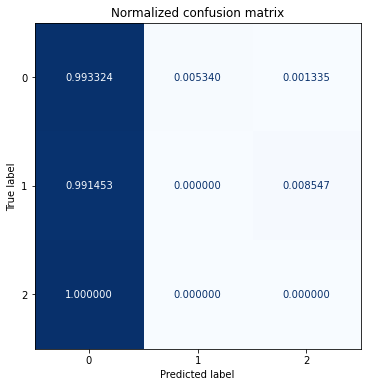

              precision    recall  f1-score   support

           0       0.68      0.99      0.81       749
           1       0.00      0.00      0.00       234
           2       0.00      0.00      0.00       123

    accuracy                           0.67      1106
   macro avg       0.23      0.33      0.27      1106
weighted avg       0.46      0.67      0.55      1106


Metrics for class 0:
True negative rate: 0.0056
True positive rate: 0.9933
False negative rate: 0.0067
False positive rate: 0.9944

Metrics for class 1:
True negative rate: 0.9954
True positive rate: 0.0000
False negative rate: 1.0000
False positive rate: 0.0046

Metrics for class 2:
True negative rate: 0.9969
True positive rate: 0.0000
False negative rate: 1.0000
False positive rate: 0.0031


df_attack_2


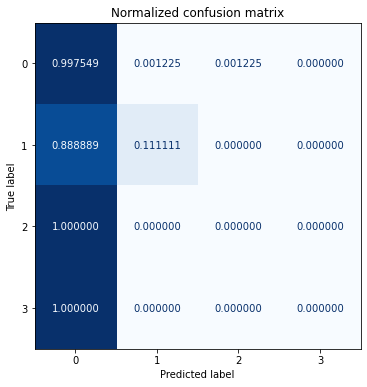

/home/orfeu/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/orfeu/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/orfeu/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.86      1.00      0.92       816
           1       0.80      0.11      0.20        36
           2       0.00      0.00      0.00        57
           3       0.00      0.00      0.00        47

    accuracy                           0.86       956
   macro avg       0.41      0.28      0.28       956
weighted avg       0.76      0.86      0.79       956


Metrics for class 0:
True negative rate: 0.0286
True positive rate: 0.9975
False negative rate: 0.0025
False positive rate: 0.9714

Metrics for class 1:
True negative rate: 0.9989
True positive rate: 0.1111
False negative rate: 0.8889
False positive rate: 0.0011

Metrics for class 2:
True negative rate: 0.9989
True positive rate: 0.0000
False negative rate: 1.0000
False positive rate: 0.0011

Metrics for class 3:
True negative rate: 1.0000
True positive rate: 0.0000
False negative rate: 1.0000
False positive rate: 0.0000


df_attack_3


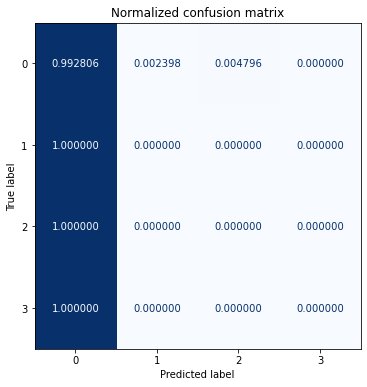

/home/orfeu/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/orfeu/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/orfeu/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.74      0.99      0.85       417
           1       0.00      0.00      0.00        76
           2       0.00      0.00      0.00        21
           3       0.00      0.00      0.00        46

    accuracy                           0.74       560
   macro avg       0.19      0.25      0.21       560
weighted avg       0.55      0.74      0.63       560


Metrics for class 0:
True negative rate: 0.0000
True positive rate: 0.9928
False negative rate: 0.0072
False positive rate: 1.0000

Metrics for class 1:
True negative rate: 0.9979
True positive rate: 0.0000
False negative rate: 1.0000
False positive rate: 0.0021

Metrics for class 2:
True negative rate: 0.9963
True positive rate: 0.0000
False negative rate: 1.0000
False positive rate: 0.0037

Metrics for class 3:
True negative rate: 1.0000
True positive rate: 0.0000
False negative rate: 1.0000
False positive rate: 0.0000


df_attack_4


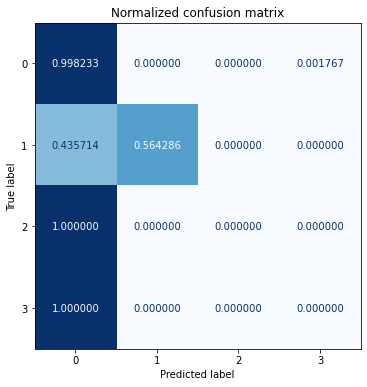

              precision    recall  f1-score   support

           0       0.71      1.00      0.83       566
           1       1.00      0.56      0.72       140
           2       0.00      0.00      0.00        62
           3       0.00      0.00      0.00       103

    accuracy                           0.74       871
   macro avg       0.43      0.39      0.39       871
weighted avg       0.62      0.74      0.66       871


Metrics for class 0:
True negative rate: 0.2590
True positive rate: 0.9982
False negative rate: 0.0018
False positive rate: 0.7410

Metrics for class 1:
True negative rate: 1.0000
True positive rate: 0.5643
False negative rate: 0.4357
False positive rate: 0.0000

Metrics for class 2:
True negative rate: 1.0000
True positive rate: 0.0000
False negative rate: 1.0000
False positive rate: 0.0000

Metrics for class 3:
True negative rate: 0.9987
True positive rate: 0.0000
False negative rate: 1.0000
False positive rate: 0.0013


/home/orfeu/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/orfeu/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/orfeu/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
dataframes = [df_attack_1, df_attack_2, df_attack_3, df_attack_4]
dataframes_name = ['df_attack_1', 'df_attack_2', 'df_attack_3', 'df_attack_4']

i=0
for df in dataframes:
    print("\n\n\033[1;33m" + dataframes_name[i] + "\033[0m")
    randomForest_attack_detector(df, dataframes_name[i] + "_conf_mat", "Random_forest")
    i+=1

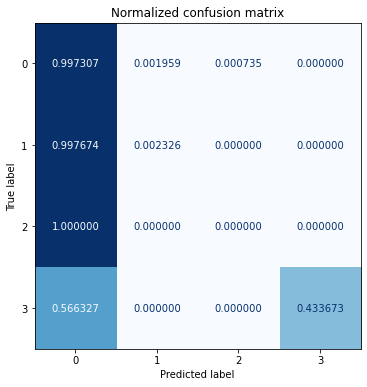

              precision    recall  f1-score   support

           0       0.82      1.00      0.90      4084
           1       0.11      0.00      0.00       430
           2       0.00      0.00      0.00       332
           3       1.00      0.43      0.60       196

    accuracy                           0.82      5042
   macro avg       0.48      0.36      0.38      5042
weighted avg       0.72      0.82      0.75      5042


Metrics for class 0:
True negative rate: 0.0898
True positive rate: 0.9973
False negative rate: 0.0027
False positive rate: 0.9102

Metrics for class 1:
True negative rate: 0.9983
True positive rate: 0.0023
False negative rate: 0.9977
False positive rate: 0.0017

Metrics for class 2:
True negative rate: 0.9994
True positive rate: 0.0000
False negative rate: 1.0000
False positive rate: 0.0006

Metrics for class 3:
True negative rate: 1.0000
True positive rate: 0.4337
False negative rate: 0.5663
False positive rate: 0.0000


In [13]:
randomForest_attack_detector(pd.concat([df_normal,df_attack_1,df_attack_2,df_attack_3,df_attack_4]), "all_attack_conf_mat", "Random_forest")

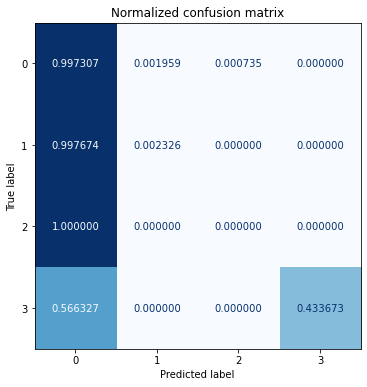

              precision    recall  f1-score   support

           0       0.82      1.00      0.90      4084
           1       0.11      0.00      0.00       430
           2       0.00      0.00      0.00       332
           3       1.00      0.43      0.60       196

    accuracy                           0.82      5042
   macro avg       0.48      0.36      0.38      5042
weighted avg       0.72      0.82      0.75      5042


Metrics for class 0:
True negative rate: 0.0898
True positive rate: 0.9973
False negative rate: 0.0027
False positive rate: 0.9102

Metrics for class 1:
True negative rate: 0.9983
True positive rate: 0.0023
False negative rate: 0.9977
False positive rate: 0.0017

Metrics for class 2:
True negative rate: 0.9994
True positive rate: 0.0000
False negative rate: 1.0000
False positive rate: 0.0006

Metrics for class 3:
True negative rate: 1.0000
True positive rate: 0.4337
False negative rate: 0.5663
False positive rate: 0.0000


In [14]:
randomForest_attack_detector(pd.concat([df_normal,df_attack_1,df_attack_2,df_attack_3,df_attack_4]), "all_attack_&_normal_conf_mat", "Random_forest")

### 3 - MLP



df_attack_1
taille 5526


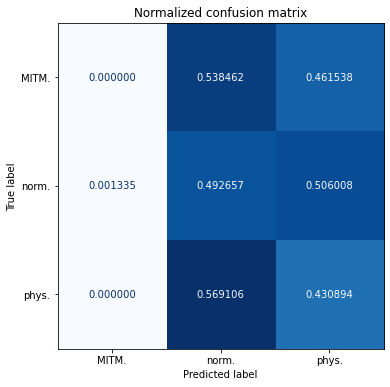

                precision    recall  f1-score   support

          MITM       0.00      0.00      0.00       234
        normal       0.65      0.49      0.56       749
physical fault       0.10      0.43      0.16       123

      accuracy                           0.38      1106
     macro avg       0.25      0.31      0.24      1106
  weighted avg       0.45      0.38      0.40      1106


Metrics for class MITM:
True negative rate: 0.9989
True positive rate: 0.0000
False negative rate: 1.0000
False positive rate: 0.0011

Metrics for class normal:
True negative rate: 0.4510
True positive rate: 0.4927
False negative rate: 0.5073
False positive rate: 0.5490

Metrics for class physical fault:
True negative rate: 0.5046
True positive rate: 0.4309
False negative rate: 0.5691
False positive rate: 0.4954


df_attack_2
taille 4776


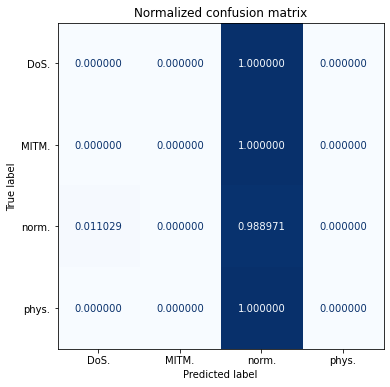

/home/orfeu/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/orfeu/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/orfeu/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

           DoS       0.00      0.00      0.00        36
          MITM       0.00      0.00      0.00        47
        normal       0.85      0.99      0.92       816
physical fault       0.00      0.00      0.00        57

      accuracy                           0.84       956
     macro avg       0.21      0.25      0.23       956
  weighted avg       0.73      0.84      0.78       956


Metrics for class DoS:
True negative rate: 0.9902
True positive rate: 0.0000
False negative rate: 1.0000
False positive rate: 0.0098

Metrics for class MITM:
True negative rate: 1.0000
True positive rate: 0.0000
False negative rate: 1.0000
False positive rate: 0.0000

Metrics for class normal:
True negative rate: 0.0000
True positive rate: 0.9890
False negative rate: 0.0110
False positive rate: 1.0000

Metrics for class physical fault:
True negative rate: 1.0000
True positive rate: 0.0000
False negative rate: 1.0000
False positive rate: 0.000

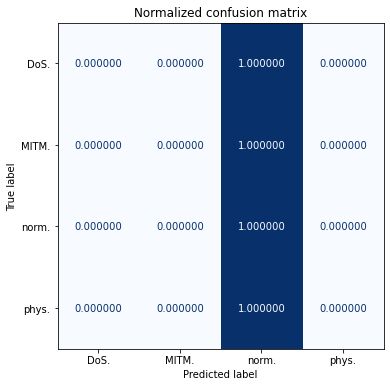

/home/orfeu/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/orfeu/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/orfeu/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

           DoS       0.00      0.00      0.00        21
          MITM       0.00      0.00      0.00        46
        normal       0.74      1.00      0.85       417
physical fault       0.00      0.00      0.00        76

      accuracy                           0.74       560
     macro avg       0.19      0.25      0.21       560
  weighted avg       0.55      0.74      0.64       560


Metrics for class DoS:
True negative rate: 1.0000
True positive rate: 0.0000
False negative rate: 1.0000
False positive rate: 0.0000

Metrics for class MITM:
True negative rate: 1.0000
True positive rate: 0.0000
False negative rate: 1.0000
False positive rate: 0.0000

Metrics for class normal:
True negative rate: 0.0000
True positive rate: 1.0000
False negative rate: 0.0000
False positive rate: 1.0000

Metrics for class physical fault:
True negative rate: 1.0000
True positive rate: 0.0000
False negative rate: 1.0000
False positive rate: 0.000

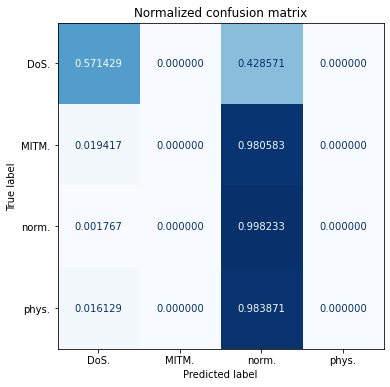

                precision    recall  f1-score   support

           DoS       0.95      0.57      0.71       140
          MITM       0.00      0.00      0.00       103
        normal       0.72      1.00      0.84       566
physical fault       0.00      0.00      0.00        62

      accuracy                           0.74       871
     macro avg       0.42      0.39      0.39       871
  weighted avg       0.62      0.74      0.66       871


Metrics for class DoS:
True negative rate: 0.9945
True positive rate: 0.5714
False negative rate: 0.4286
False positive rate: 0.0055

Metrics for class MITM:
True negative rate: 1.0000
True positive rate: 0.0000
False negative rate: 1.0000
False positive rate: 0.0000

Metrics for class normal:
True negative rate: 0.2721
True positive rate: 0.9982
False negative rate: 0.0018
False positive rate: 0.7279

Metrics for class physical fault:
True negative rate: 1.0000
True positive rate: 0.0000
False negative rate: 1.0000
False positive rate: 0.000

/home/orfeu/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/orfeu/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/orfeu/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
dataframes = [df_attack_1, df_attack_2, df_attack_3, df_attack_4]
dataframes_name = ['df_attack_1', 'df_attack_2', 'df_attack_3', 'df_attack_4']

i=0
for df in dataframes:
    print("\n\n\033[1;33m" + dataframes_name[i] + "\033[0m")
    MLP_attack_detector(df, dataframes_name[i] + "_conf_mat", "MLP")
    i+=1

### 4 - SVM



df_attack_1
taille 5526


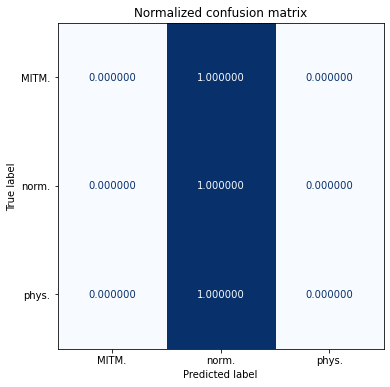

/home/orfeu/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/orfeu/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/orfeu/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

          MITM       0.00      0.00      0.00       234
        normal       0.68      1.00      0.81       749
physical fault       0.00      0.00      0.00       123

      accuracy                           0.68      1106
     macro avg       0.23      0.33      0.27      1106
  weighted avg       0.46      0.68      0.55      1106


Metrics for class MITM:
True negative rate: 1.0000
True positive rate: 0.0000
False negative rate: 1.0000
False positive rate: 0.0000

Metrics for class normal:
True negative rate: 0.0000
True positive rate: 1.0000
False negative rate: 0.0000
False positive rate: 1.0000

Metrics for class physical fault:
True negative rate: 1.0000
True positive rate: 0.0000
False negative rate: 1.0000
False positive rate: 0.0000


df_attack_2
taille 4776


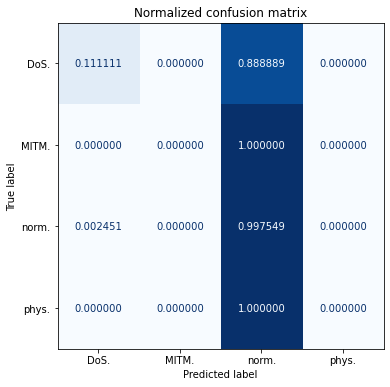

/home/orfeu/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/orfeu/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/orfeu/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

           DoS       0.67      0.11      0.19        36
          MITM       0.00      0.00      0.00        47
        normal       0.86      1.00      0.92       816
physical fault       0.00      0.00      0.00        57

      accuracy                           0.86       956
     macro avg       0.38      0.28      0.28       956
  weighted avg       0.76      0.86      0.79       956


Metrics for class DoS:
True negative rate: 0.9978
True positive rate: 0.1111
False negative rate: 0.8889
False positive rate: 0.0022

Metrics for class MITM:
True negative rate: 1.0000
True positive rate: 0.0000
False negative rate: 1.0000
False positive rate: 0.0000

Metrics for class normal:
True negative rate: 0.0286
True positive rate: 0.9975
False negative rate: 0.0025
False positive rate: 0.9714

Metrics for class physical fault:
True negative rate: 1.0000
True positive rate: 0.0000
False negative rate: 1.0000
False positive rate: 0.000

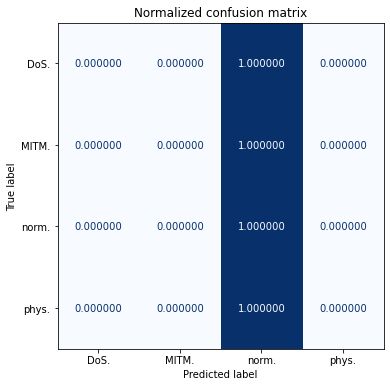

/home/orfeu/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/orfeu/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/orfeu/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

           DoS       0.00      0.00      0.00        21
          MITM       0.00      0.00      0.00        46
        normal       0.74      1.00      0.85       417
physical fault       0.00      0.00      0.00        76

      accuracy                           0.74       560
     macro avg       0.19      0.25      0.21       560
  weighted avg       0.55      0.74      0.64       560


Metrics for class DoS:
True negative rate: 1.0000
True positive rate: 0.0000
False negative rate: 1.0000
False positive rate: 0.0000

Metrics for class MITM:
True negative rate: 1.0000
True positive rate: 0.0000
False negative rate: 1.0000
False positive rate: 0.0000

Metrics for class normal:
True negative rate: 0.0000
True positive rate: 1.0000
False negative rate: 0.0000
False positive rate: 1.0000

Metrics for class physical fault:
True negative rate: 1.0000
True positive rate: 0.0000
False negative rate: 1.0000
False positive rate: 0.000

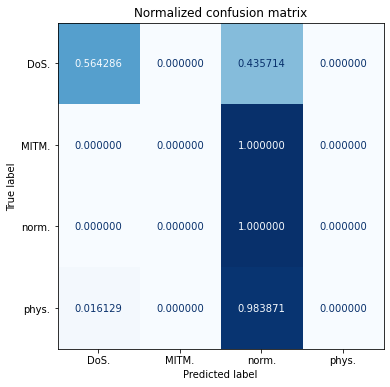

                precision    recall  f1-score   support

           DoS       0.99      0.56      0.72       140
          MITM       0.00      0.00      0.00       103
        normal       0.72      1.00      0.83       566
physical fault       0.00      0.00      0.00        62

      accuracy                           0.74       871
     macro avg       0.43      0.39      0.39       871
  weighted avg       0.62      0.74      0.66       871


Metrics for class DoS:
True negative rate: 0.9986
True positive rate: 0.5643
False negative rate: 0.4357
False positive rate: 0.0014

Metrics for class MITM:
True negative rate: 1.0000
True positive rate: 0.0000
False negative rate: 1.0000
False positive rate: 0.0000

Metrics for class normal:
True negative rate: 0.2623
True positive rate: 1.0000
False negative rate: 0.0000
False positive rate: 0.7377

Metrics for class physical fault:
True negative rate: 1.0000
True positive rate: 0.0000
False negative rate: 1.0000
False positive rate: 0.000

/home/orfeu/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/orfeu/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/orfeu/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
dataframes = [df_attack_1, df_attack_2, df_attack_3, df_attack_4]
dataframes_name = ['df_attack_1', 'df_attack_2', 'df_attack_3', 'df_attack_4']

i=0
for df in dataframes:
    print("\n\n\033[1;33m" + dataframes_name[i] + "\033[0m")
    SVM_attack_detector(df, dataframes_name[i] + "_conf_mat", "SVM")
    i+=1